# Pymaceuticals Inc.
---

### Analysis

## Overview
- The study had 249 mice; however, initial analysis showed that one mouse had multiple values for several timepoints. That mouse was removed from further analysis.
- 6 drugs had average and median tumor volumes below placebo, and 7 drugs had variance, standard deviation, and standard error less than placebo.
- Drug regimens have between 148 and 230 observations, with 7 of the 10 drugs (including placebo) between 178 and 188 observations.
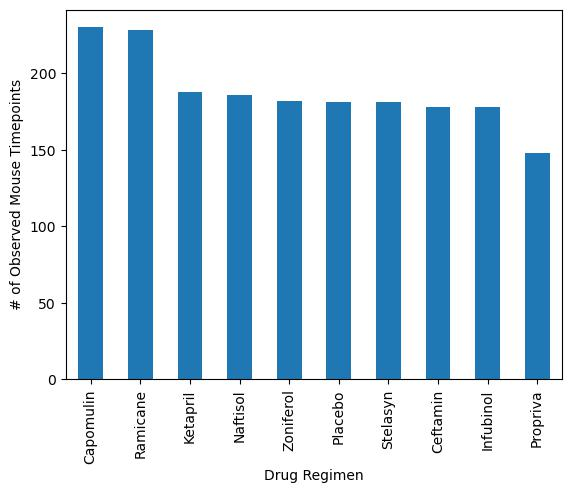

- The study is split nearly evenly between sex overall (although the individual drug regimens vary somewhat on distribution, but all drugs used both sexes).
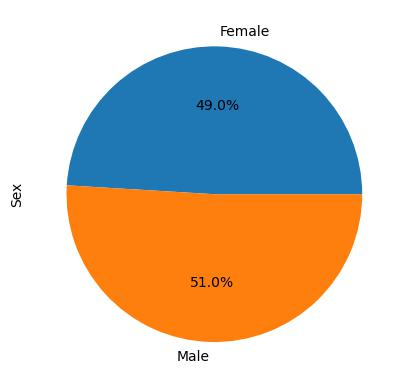

## Analysis of 4 Best-Performing Drugs
- Based on overall mean/median/var/std/sem, Ramicane, Capomulin, Ceftamin, and Infubinol were the best overall drug regimens.
- The final tumor volumes for mice on these drugs were all within expected ranges, with only one outlier for Infubinol (and that outlier's final tumor volume was much lower than the rest of the Infubinol mice).
- Capomulin and Ramicane had very similar medians and inter-quartile ranges (median around 40 mm<sup>3</sup>), and Ceftamin and Infubinol both had medians around 60 mm<sup>3</sup>.
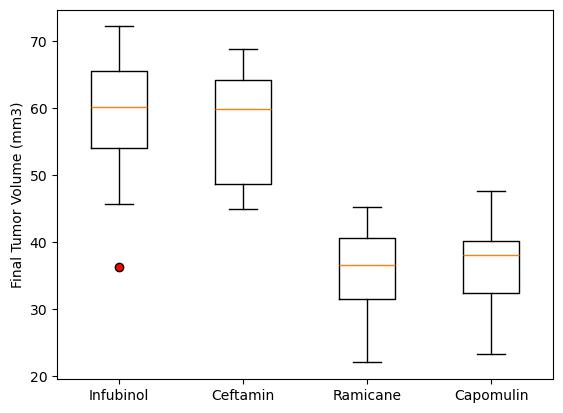

## Results Over Time for an Individual Mouse
- One mouse was selected to illustrate Capomulin's effect on tumor size volume the trial period.
- Mouse i738 tumor volume fell during the first half of the trial, then grew slowly in the second half.
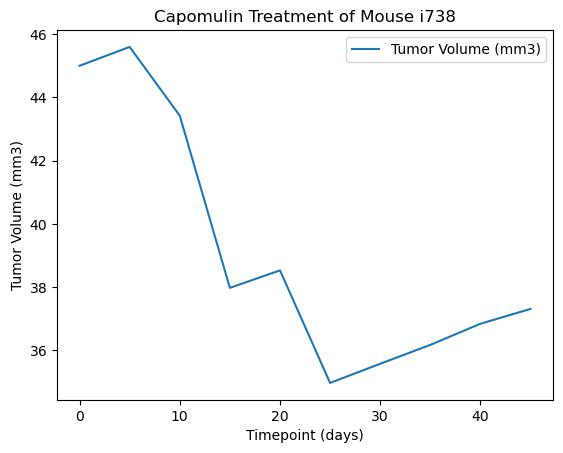

- When all mice are plotted together, results appear mixed, but it seems like i738's results are like those of the rest of the group: the drug is effective early and loses efficacy later, but the tumor volume at the end for most mice is reduced compared to the beginning of the trial.
- 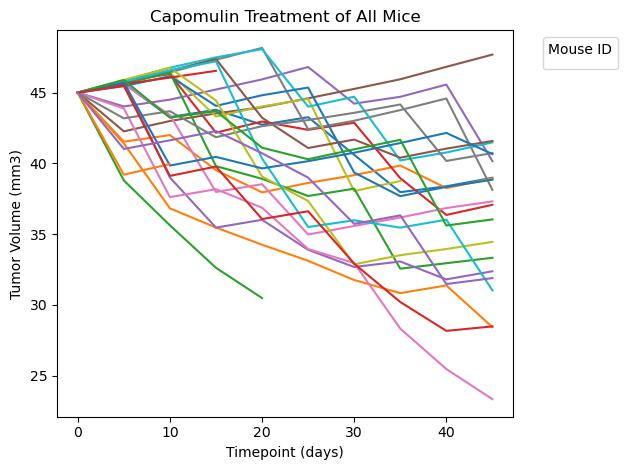

 ## Tumor Volume vs. Mouse Weight
- The graph below shows tumor volume versus weight for mice in the Capomulin group:

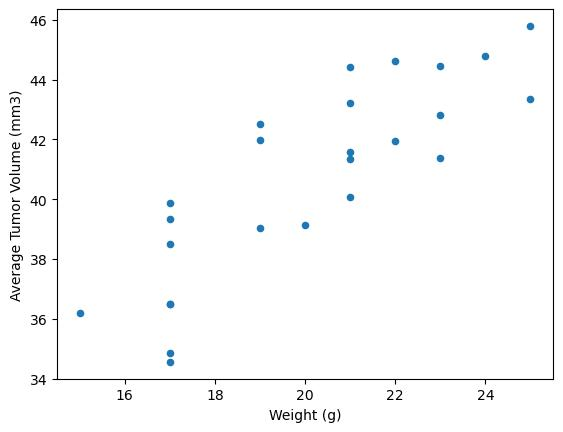

- The correlation between tumor volume and weight is 0.84, suggesting a fairly strong correlation:
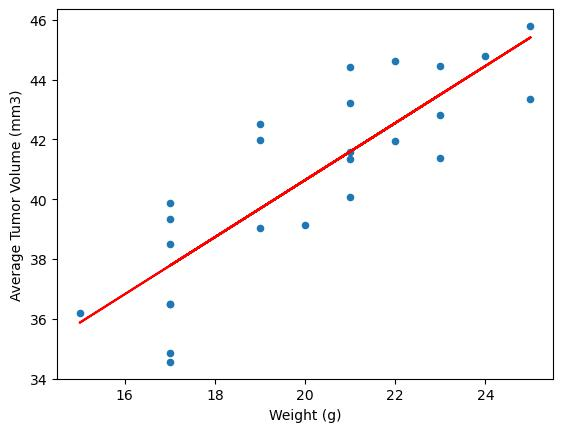

## Conclusions
- While it seems that the drug loses efficacy over time, it certainly shows promise in shrinking tumor volume in the shorter term.
- The correlation between tumor volume vs mouse weight seems logical, though there's no clear evidence that the two are truly related.
- Possible next steps:
    - Perhaps Capomulin could be combined with another drug to shrink tumors further.
    - It's also possible that a "rest period" would help longer-term efficacy.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()


In [ ]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_IDs=combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]["Mouse ID"].unique()
dupe_IDs


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df=combined_df.loc[combined_df["Mouse ID"].isin(dupe_IDs)]
dupe_df


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=combined_df.drop(dupe_df.index)
clean_df.head()


In [ ]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_s = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_s = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_s = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_s = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
ste_s = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summ_df=pd.DataFrame({"Mean Tumor Volume": mean_s, "Median Tumor Volume": median_s,
                      "Tumor Volume Variance": var_s, "Tumor Volume Std. Dev.": std_s,
                      "Tumor Volume Std. Err.": ste_s})
summ_df


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


agg_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
agg_df


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_df=clean_df.groupby("Drug Regimen").count()["Timepoint"]
counts_df=counts_df.sort_values(ascending=False)
counts_plot=counts_df.plot(kind="bar",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")
plt.savefig("output/barplot.jpg", bbox_inches='tight')
plt.show()


In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = counts_df.index
y_vals= [counts_df[i] for i in counts_df.index]

plt.bar(x_axis,y_vals,align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# I'm curious about the distribution of genders among drugs
# mouse_metadata.groupby("Drug Regimen")["Sex"].value_counts()

sex_counts=clean_df.groupby(["Sex"])["Mouse ID"].count()
sex_counts=sex_counts.sort_values()
sex_counts.plot.pie(y="Sex",autopct="%1.1f%%")
plt.ylabel("Sex")
plt.savefig("output/pieplot.jpg", bbox_inches='tight')
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=clean_df["Sex"].unique()
sexes=clean_df.groupby(["Sex"])["Mouse ID"].count()
plt.pie(sexes,labels=labels,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_cut=clean_df.loc[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
max_tp=clean_df.groupby(drug_cut["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
vol_df=pd.merge(max_tp,clean_df[["Mouse ID","Tumor Volume (mm3)","Drug Regimen","Timepoint"]],
                how="inner",on=["Mouse ID","Timepoint"])
vol_df=vol_df.dropna()
vol_df=vol_df[["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=vol_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_trmt in treatments:
    q_df=vol_df.loc[vol_df["Drug Regimen"]==each_trmt]
    quartiles = q_df.quantile([0.25,.5,.75],numeric_only=True)

    # for some reason i could not get the code for lowerq and upperq in the exercise
    # (5-3-2 - Ins_Quartiles_and_Outliers) to work in this notebook. the same code works
    # for me in the exercise. on this one it threw a KeyError on .25 for lowerq=quartiles[.25].
    # Xpert told me to try .loc 
    
    lowerq = quartiles.loc[.25] 
    upperq = quartiles.loc[.75]
    iqr = upperq.iloc[0]-lowerq.iloc[0]
    lower_bound = lowerq.iloc[0] - (1.5*iqr)
    upper_bound = upperq.iloc[0] + (1.5*iqr)

    trmt_mice=vol_df.loc[vol_df["Drug Regimen"]==each_trmt]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    trmt_outliers=vol_df.loc[(vol_df["Drug Regimen"]==each_trmt)&
    ((vol_df["Tumor Volume (mm3)"]<lower_bound)|(vol_df["Tumor Volume (mm3)"]<lower_bound))]
    trmt_outliers=trmt_mice.loc[(trmt_mice["Tumor Volume (mm3)"]<lower_bound)|(vol_df["Tumor Volume (mm3)"]<lower_bound)]
    trmt_outliers=trmt_outliers["Tumor Volume (mm3)"]

    # add subset 
    vol_data.append(trmt_mice["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    print(f"{each_trmt}'s potential outliers: {trmt_outliers}")
    print(trmt_mice["Tumor Volume (mm3)"].median())

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data,labels=treatments,flierprops=dict(markerfacecolor="red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.savefig("output/boxplot.jpg", bbox_inches='tight')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df=vol_df.loc[(vol_df["Drug Regimen"]=="Capomulin")] # shows all mice on Capomulin
mouse_id=cap_df.iloc[6] # selected index from cap_df - mouse ID is i738
selected_df=clean_df.loc[clean_df["Mouse ID"]=="i738"]
selected_df
selected_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse i738")
plt.savefig("output/singlemouse.jpg", bbox_inches='tight')
plt.show()

In [ ]:
# I was curious how all mice fared on Capomulin - I know it's not required but thought it might be interesting to look at the whole group. Google helped me make this loop.
# cap_df=vol_df.loc[(vol_df["Drug Regimen"]=="Capomulin")] # shows all mice on Capomulin
# fig, ax = plt.subplots()

# # Iterate over all unique mouse IDs in cap_df
# for mouse_id in cap_df["Mouse ID"]:
#     selected_df = clean_df.loc[clean_df["Mouse ID"] == mouse_id]
#     ax.plot(selected_df["Timepoint"], selected_df["Tumor Volume (mm3)"])

# # Customize the plot
# plt.xlabel("Timepoint (days)")
# plt.ylabel("Tumor Volume (mm3)")
# plt.title("Capomulin Treatment of All Mice")
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Mouse ID')  # Adjust legend placement
# plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.savefig("output/all_mice.jpg",bbox_inches='tight')
# plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_df=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")]
vol_weight_df=avg_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean() #weight doesn't change over time so mean is just the mouse's weight

vol_weight_df.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("output/scatter.jpg")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(vol_weight_df["Weight (g)"],vol_weight_df["Tumor Volume (mm3)"])
corr=correlation[0]
print(f"The correlation between mouse weight and average tumor volume is {corr:.2f}")
vol_weight_df.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept,rvalue,pvalue,sterr)=st.linregress(vol_weight_df["Weight (g)"],
                                                     vol_weight_df["Tumor Volume (mm3)"])
regress_vals=vol_weight_df["Weight (g)"]*slope+intercept
plt.plot(vol_weight_df["Weight (g)"],regress_vals,"r-")
plt.savefig("output/scatterwcorr.jpg", bbox_inches='tight')
plt.show()
